<a href="https://colab.research.google.com/github/amin3305/Neural_Network_from_scratch/blob/master/Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

In this project we will implement a neural network (NN) architecture from scratch. Building the neural network will give a hands-on experience converting mathematical foundations of NN such as feed-forward and backpropagation algorithms into Python code. The project will also include implementation of sub-functions in NN such as loss functions, activation functions, and derivatives.

The model implemented will be tested on following examples:

#### Classification:

1. AND/OR Logic
2. XOR Logic

#### Regression:

1. Sinusoidal curve
2. Gaussian curve

The model will be evaluated on real world data using the Wisconsin Breast Cancer Dataset. 





### Problem Description

You are provided with a base Class for implementation of a simple Neural Network. You will also be provided with templates for some of the helper functions. You are required to implement functions in the Neural Network Class. You are also required to test your neural network with various datasets and show the effect of modifying parameters. Below is a list of problems that you are expected to solve in this Project:

1. Complete the implementation of Feedforward and Backpropagation
2. Implement functions for train, predict, and evaluate
3. Generate datasets for AND, XOR logics and Sinusoidal, Gaussian functions
4. Test your model using the above datasets. What are you choice of model parameters and how does it affect the performance?
5. Implement functions to improve model performance. What are your observations
6. Evaluate model performance on Wisconsin Breast Cancer dataset. What is the highest accuracy score obtained?

### Notes

1. Only following Python libraries (and their functions) are allowed: **numpy, pandas, matplotlib, seaborn.** (The code provided include the use of sklearn library for loading data, evaluation, and TSNE encoding. Do not load any other functions from sklearn.)
2. Following libraries from Python may not be used: **Keras, TensorFlow, pytorch, thean, scikit-learn (except functions that are already included)**
3. You may refer to online resources but do not copy+paste. All submitted items will be checked for Plagiarism.
4. The base class provided is for your reference. You are welcome to implement the NN algorithm differently. In that case, ensure that your implementation covers all the sub-problems. Also explain your methodology.

### Import Libraries

* numpy, pandas - Data handling and processing
* matplotlib, seaborn - Visualization
* tqdm - For implementing progressbars
* sklearn - datasets: to load breast cancer dataset, TSNE: for visualization


In [ ]:
# Imports
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Phase 1: Implement and test a baseline Neural Network

#### 1.1 Activation functions and derivatives

In the below cell we define sigmoid activation function and its derivative

In [ ]:
# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)

# Activation function
def relu(t):
    return np.maximum(0,t)

# Derivative of relu
def relu_derivative(p):
    x[x<=0] = 0
    x[x>0] = 1
    return x  

def tanh(t):
    #return (2/(1+np.exp(-2*t)))-1
    return np.tanh(t)

def tanh_derivative(p):
    #return 1 - np.power(p,2)
    return 1.0 - np.tanh(p)**2

#### 1.2 Loss functions and derivatives

In the below cell we define rmse loss function and its derivative

In [ ]:
# Loss function - RMSE
def rmse(y, ypred):
    return np.sqrt(np.mean((y - ypred)**2))

# Loss function derivative - RMSE
def rmse_derivative(y, ypred):
    return 2*(y - ypred)

# Loss function - Cross Entropy
def cross_entropy(X,y):
    X = X.clip(min=1e-8,max=None)
    return -np.mean(np.multiply(y, np.log(X)) + np.multiply((1-y), np.log(1-X)))

# Loss function derivative - Cross Entropy
def cross_entropy_derivative(X,y):
    return (X-y)/(X*(1-X))

#### 1.3 Base Class

Below is the base class implementation for Neural Network. Please add code whereever it reads **Write your code here**

In [ ]:
# Class definition
class NeuralNetwork:
    def __init__(self, x, y, hidden_nodes, learning_rate):
        """
        Class initializer. Loads the value of input data and initializes weights

        Parameters:
        x: input data
        y: ground truth label

        Sets class parameters:
        self.x = input data
        self.y = ground truth label
        self.ypred = initialize prediction variable with zeros as the same shape as ground truth

        self.weights = weights for each layer
        self.bias = bias for each layer

        self.hidden_nodes = number of nodes in the hidden layer
        """

        self.x = x
        self.y = y
        self.ypred = np.zeros(y.shape)

        self.hidden_nodes = hidden_nodes
        
        self.weights1= np.random.rand(self.x.shape[1], self.hidden_nodes)
        self.weights2 = np.random.rand(self.hidden_nodes, 1)

        self.bias1 = np.random.rand(self.hidden_nodes)
        self.bias2 = np.random.rand(1)

        self.lr = learning_rate
        
        
    def feedforward(self):
        """
        Perform feedforward operation: input -> layer1 -> layer2
        
        HINT:
        layer1 = activation(weight1<dot>x + bias1)
        layer2 = activation(weight2<dot>x + bias2)

        For example: self.layer1 = sigmoid(np.dot(self.x, self.weights1) + self.bias1)

        Parameters:
        x: input data
        y: ground truth label

        Return:
        self.layer2: The output from layer2
        """

        # Write your code here
        self.layer1 = tanh(np.dot(self.x,self.weights1)+self.bias1)
        self.layer2 = tanh(np.dot(self.layer1,self.weights2)+self.bias2)
        return self.layer2
        
    def backprop(self):
        """
        Perform backpropagation to update weights and bias: loss -> layer2 -> layer1
        
        HINT:
        d_loss = derivative of loss (example rmse_derivative)
        d_weights2 = layer1_out <dot> d_loss*d_activation
        d_bias2 = I <dot> d_loss*d_activation

        repeat for d_weights1 and d_bias1

        Update weights and bias based on the error and learning rate

        Updates:
        Model weights and biases
        """
        d_loss = rmse_derivative(self.y, self.ypred)
        d_z = d_loss * tanh_derivative(self.layer2)
   
        # Write your code here
        # compute gradients
    
        d_weights2 = np.dot(self.layer1.T, d_z)
        d_bias2 = np.dot(np.ones(d_z.T.shape), d_z)

        d_weights1 = np.dot(self.x.T, np.dot(d_z, self.weights2.T) * tanh_derivative(self.layer1)) 
        d_bias1 =  np.dot(np.ones(self.x.shape[0]), np.dot(d_z, d_bias2.T) * tanh_derivative(self.layer1))

        # update parameters
        self.weights1 += self.lr * d_weights1
        self.weights2 += self.lr * d_weights2

        self.bias1 += self.lr * d_bias1
        self.bias2 += self.lr * d_bias2[0]

    def train(self, x, y):
        """
        Train the model based on training data passed as input
        
        HINT:
        Training involves two steps:
        output <- feedforward
        update_weights <- backpropagate

        Parameters:
        x: input data
        y: ground truth label

        Return: NONE

        Updates: prediction self.ypred
        """
        self.x = x
        self.y = y

        # Write your code here

        self.ypred = self.feedforward()
        self.backprop()
    
    
    def predict(self, x):
        """
        Predict the outcome for the given input using current model
        
        HINT:
        For prediction output is obtained by performing feedforward

        Parameters:
        x: input data

        Return: output prediction using the model (self.ypred)
        """
        self.x = x

        # Write your code here
        self.ypred = self.feedforward()
        return self.ypred

    def evaluate(self, y, ypred):
        """
        Compute the error for given ground truth and prediction obtained
        
        HINT:
        Training involves two steps:
        output <- feedforward
        update_weights <- backpropagate

        Parameters:
        y: ground truth
        ypred: output prediction

        Return: prediction error self.loss
        """
        self.y = y
        self.ypred = ypred

        # write your code here
        self.loss = rmse(self.y,self.ypred)
        return self.loss

#### 1.4 Backpropagation Algorithm

<img src="https://miro.medium.com/max/1742/1*FceBJSJ7j8jHjb4TmLV0Ew.png" width="600" />

Based on your code (The base NN class, activation, and loss functions) please explain how backpropagation works. Consider to explain the original algorithm and your code flow. Feel free to use mathematical equations, images, code outputs for your explanation.

You may consider the following reference:

1.   [BP Algorithm Implementation](http://www.adeveloperdiary.com/data-science/machine-learning/understand-and-implement-the-backpropagation-algorithm-from-scratch-in-python/)
2.   [How BP Algorithm works](http://neuralnetworksanddeeplearning.com/chap2.html)



**Backpropagation explanation**

the activation used is the sigmoid activation. for the feedforward function, the inputs are passed and dot product with the first layer weights before adding the first layer bias which is shown in self.layer1.

for the second layer, the outputs from the first layer will undergo dot product with the second layer weights before adding the second layer bias which is shown in self.layer2.

the output of self.layer2 is equated to be self.ypred. the loss can be calculated by passing it through the evaluate() function which gives the RMSE loss as np.sqrt(np.mean((y - ypred)**2))

For the backpropagation, we calculate the derivative of the loss with respect to weights and bias respectively. we use the gradient descent algorithm to adjust the value of weights and bias so as to minimise the loss. this can be calculated by using the chain rule where the derivative of the loss with respect to weight is calculated by (derivative of sum of weights and bias wrt weights) multiply with (derivative of activation function wrt to sum of weights and bias) multiply with (derivative of loss wrt to activation function). the same can be applied to bias where we replace the weights with bias

this can be seen in the code where d_weights2 is calculated as dot product of the transpose of input and (d_loss*sigmoid_derivative). for d_weights1, we take the previous loss from weights2 and multiply with the sigmoid_derivative before we dot product with the transpose of the input x.

After calculating the derivative of the loss with respect to the weights, we can update the weights by using self.weights1 += self.lr * d_weights1. the bias can also be calculated the same way. However for bias2, the update is given as self.bias2 += self.lr * d_bias2[0] since bias2 returns 2 of the same values so we take only 1.

#### 1.5: Classification Test

Setup data for AND logic and XOR logic. Train the model and observe if the model is able to correctly classify

For AND Logic:

| x | x | y |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

For XOR Logic:

| x | x | y |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |




##### 1.5.1 Initialization

In [ ]:
# Each row is a training example, each column is a feature
# x = np.array(([X1, X2], ...), dtype=float)
# y = np.array(([y], ...), dtype=float)

#x= np.array(([0,0],[0,1],[1,0],[1,1]), dtype=float)
#y= np.array(([0],[0],[0],[1]), dtype=float)

#x= np.array(([0,0],[0,1],[1,0],[1,1]), dtype=float)
#y= np.array(([0],[1],[1],[0]), dtype=float)

x = np.arange(-1,1,0.05).reshape(-1,1)
y = np.sin(np.pi*x)

hidden_nodes = 30
learning_rate = 0.0005

NN = NeuralNetwork(x, y, hidden_nodes, learning_rate)
#print ("Input : \n" + str(x))
#print ("Actual Output: \n" + str(y))

##### 1.5.2 Train model

In [ ]:
loss = []
epochs = 100000

#tqdm generates a progress bar
for i in tqdm(range(epochs)):
    loss.append(NN.evaluate(NN.y, NN.ypred))
    NN.train(x, y)

##### 1.5.3 Loss trend over epochs

Observing the loss trend helps choose model parameters. For example, if the loss is continuing to decrease, the number of epochs may need to be increased. Choice of learning rate may affect the loss trend

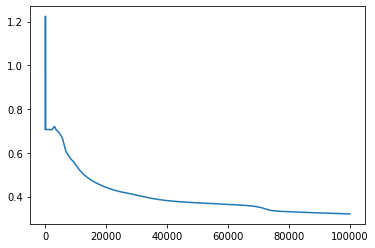

In [ ]:
plt.plot(loss)

##### 1.5.4 Print weights and biases

In [ ]:
print('weights 1:\n', NN.weights1)
print('weights 2:\n', NN.weights2)

print('bias 1:\n', NN.bias1)
print('bias 2:\n', NN.bias2)

##### 1.5.5 Observe Decision Boundary

The below code is used to visualize the decision boundary over the region between 0 to 1 for both feature inputs. Do not modify the code below. Ensure your neural network is trained before running the code below

In [ ]:
outcome = []
for i in np.arange(0,1,0.01):
  for j in np.arange(0,1,0.01):
    p = NN.predict(x=[i, j])
    outcome.append([i, j, p[0]])
  
outcome = np.array(outcome)

f = plt.figure(figsize=(5,5))
plt.scatter(outcome[:,0], outcome[:,1], c=outcome[:,2], cmap="coolwarm")

#### 1.6 Classification: Notes

* Perform from steps **1.5.1 to 1.5.5 for each of AND logic and XOR logic** separately
* You may additional text or code cells to note down the outcomes as appropriate
* Add a text cell to highlight your observations and inference



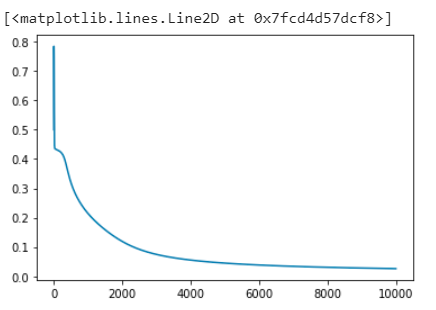

---
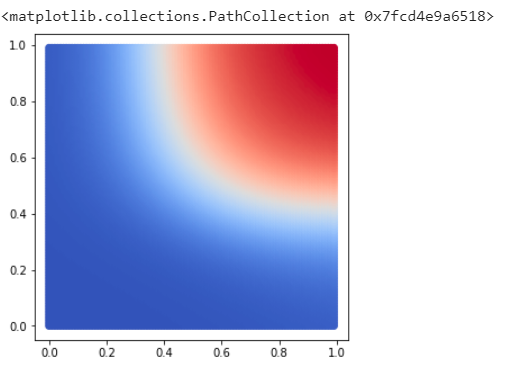

**Outcome for AND logic with 4 hidden nodes**
The above results are obtained using 4 hidden nodes. The decision boundary is not separated by a straight line because the model is not accurate enough.

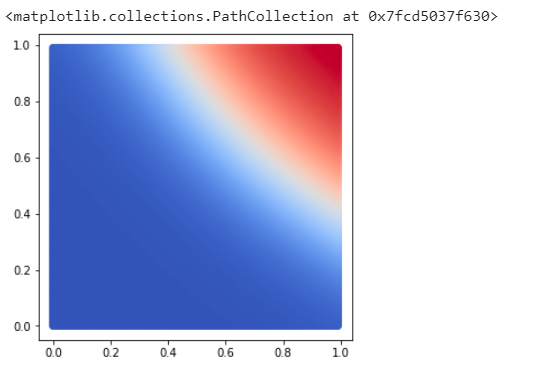

**Outcome for AND logic with 16 hidden nodes**
With the increase in the number of hidden nodes the accuracy of the neural network improved as shown in the boundary decision. the boundary decision is now separated by a straight line and the red parts are more concentrated at the corner when x=1, y=1.

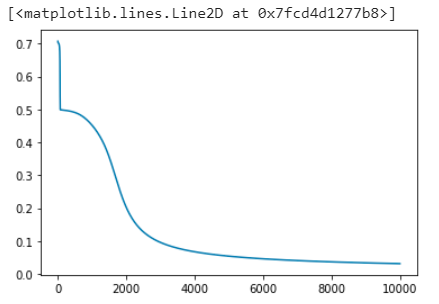

---

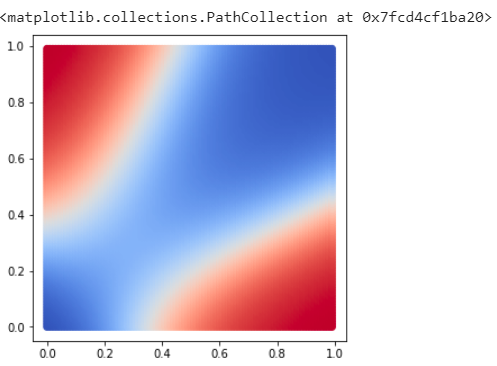

**Outcome for XOR logic with 16 hidden nodes**

The above results show that the neural network is fairly accurate as it is able to show the desired decision boundary with the red parts at x=1,y=0 and x=0,y=1

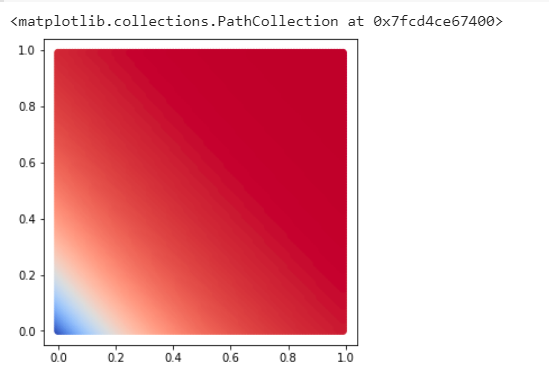

---

**Outcome for XOR logic with 64 hidden nodes**

However, increasing the number of hidden nodes does not mean the neural network will improve all the time as higher number of hidden nodes will cause the model to be affected by overfitting. this is shown above as the decision boundary for XOR logic is not achieved

#### 1.7: Regression Test

Setup data for a Sinusoidal function and Gaussian function. For example,

```
x = np.arange(-1,1,0.01).reshape(-1,1)
y = np.sin(np.pi*x)
```

HINT: When the output values are negative sigmoid activation at the output may not work. You may need to consider alternatives such as linear or tanh. If you find this difficult to implement you may consider only the positive cycle range for sine.

Also note that when training entire batch of input (for eg. 200 samples) may lead to overflow. You may need to modify the code for sequential learning or mini-batch learning.

Repeat the steps from 1.5.1 to 1.5.4 and record your outcomes. For visualizing the outcome **(do not use 1.5.5)** instead run the following code.

##### 1.7.5: Observe outcomes

In [ ]:
#initialisation for sine function
x = np.arange(-1,1,0.1).reshape(-1,1)
y = np.sin(np.pi*x)

hidden_nodes = 30
learning_rate = 0.0005

NN = NeuralNetwork(x, y, hidden_nodes, learning_rate)

In [ ]:
#training for sine
loss = []
epochs = 300000

#tqdm generates a progress bar
for i in tqdm(range(epochs)):
    loss.append(NN.evaluate(NN.y, NN.ypred))
    NN.train(x, y)

**Results for sine function**
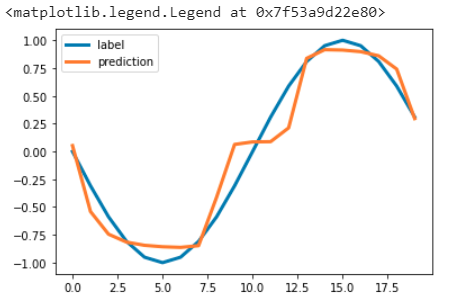

The predicted results resembles a sinusoidal curve but it is not perfect since it deviates slightly at certain points. i had used the original model with 1 hidden layer which may not be optimal in this case. the activation function used in this model had to be changed from sigmoid to tanh since tanh gives an output from -1 to 1 whereas the sigmoid function only gives an output from 0 to 1. Increasing the number of epochs did not improve the results since it causes overfitting. the results became worse when i increased the number of epochs to 500000. perhaps more hidden layers are needed or early stopping is needed to improve the model further.

In [ ]:
plt.plot(y, linewidth=3)
plt.plot(NN.predict(x), linewidth=3)
plt.legend(['label', 'prediction'])

#### 1.8 Regression: Notes

Using the steps illustrated for Problem 2 (except observing outcomes) test the ability of your neural network to perform regression task. What are your observations. How are some of the ways that the model can be improved?

### Phase 2: Integrate additional functionalities to the Neural Network model

The base class implementation of Neural Network provided is elementary and there are several features that can be improved. Implement any 3 of the following possible improvements (You are welcome to try all 5)

1. Introduce regularization of model parameters (weights and bias)
2. Enable mini-batch/ sequential learning where the number of items in a batch can be customized.
3. Implement one more hidden layer
4. Introduce ReLU activation. Implement Cross Entropy loss function.
5. Enable one or more of the following: Learning rate decay, early-stopping, Custom weights and bias initializer (eg. zeros, ones, Gaussian, etc)

HINTS:

* For 1, a regularization parameter will be required which can be set under __init__
* For 2, Batch learning can be introduced while training the model using a nested for loop approach. This does not require modification of the original class
* For 3, you will have to backpropagate loss through one more layer, which is like a chain operation
* For 4 and 5, you need to implement both the actual function (for feed-forward) and its derivate (for backpropagation)





#### Text description for Phase 2

In [ ]:
### Codes related to Phase 2
class NeuralNetwork_improved:
    def __init__(self, x, y, hidden_nodes1, hidden_nodes2, learning_rate, lamda, weights=None, loss_function = "rmse", activation_function = "sigmoid"):
        self.x = x
        self.y = y
        self.ypred = np.zeros(y.shape)

        self.hidden_nodes1 = hidden_nodes1
        self.hidden_nodes2 = hidden_nodes2
        if weights:
          self.weights1 = weights[0]
          self.weights2 = weights[1]
          self.weights3 = weights[2]
          self.bias1 = weights[3]
          self.bias2 = weights[4]
          self.bias3 = weights[5]
        else:
          self.weights1= np.random.rand(self.x.shape[1], self.hidden_nodes1)
          
          self.weights2 = np.random.rand(self.hidden_nodes1, self.hidden_nodes2)
          self.weights3 = np.random.rand(self.hidden_nodes2, 1)
          self.bias1 = np.random.rand(self.hidden_nodes1)
          self.bias2 = np.random.rand(self.hidden_nodes2)
          self.bias3 = np.random.rand(1)

        self.lr = learning_rate

        activation_function_dict = {"sigmoid": sigmoid, "relu": relu}
        loss_function_dict = {"rmse": rmse, "cross_entropy": cross_entropy}
        
        self.lamda = lamda
        self.activation_function = activation_function_dict[activation_function]
        self.loss_function = loss_function_dict[loss_function]
        
        
    def feedforward(self):
      
        self.layer1 = self.activation_function(np.dot(self.x,self.weights1)+self.bias1)
        
        self.layer2 = self.activation_function(np.dot(self.layer1,self.weights2)+self.bias2)
        
        self.layer3 = self.activation_function(np.dot(self.layer2,self.weights3)+self.bias3)
        return self.layer3
        
    def backprop(self):
        if (self.loss_function==rmse):
          loss_deriv=rmse_derivative
        elif (self.loss_function == cross_entropy):
          loss_deriv = cross_entropy_derivative
        if (self.activation_function==sigmoid):
          activation_deriv = sigmoid_derivative
        elif (self.activation_function==relu):
          activation_deriv = relu_derivative
        d_loss = loss_deriv(self.y, self.ypred)

        dz_3 = d_loss * activation_deriv(self.layer3)
        d_weights3 = np.dot(self.layer2.T, dz_3)
        d_bias3 =  np.dot(np.ones(dz_3.T.shape),dz_3)
        
        dz_2 = np.dot(dz_3, self.weights3.T) * activation_deriv(self.layer2)
        d_weights2 = np.dot(self.layer1.T, dz_2)
        d_bias2 = np.dot(np.ones(self.layer1.shape[0]), dz_2)

        dz_1 = np.dot(dz_2, self.weights2.T) * activation_deriv(self.layer1)
        d_weights1 =  np.dot(self.x.T, dz_1)
        d_bias1 = np.dot(np.ones(self.x.shape[0]), dz_1)

        # update parameters

        self.weights1 =self.weights1 + self.lr*d_weights1 - self.lamda * self.weights1
        self.weights2 =self.weights2 + self.lr*d_weights2- self.lamda * self.weights2
        self.weights3 =self.weights3 + self.lr*d_weights3- self.lamda * self.weights3

        self.bias1 += self.lr*d_bias1
        self.bias2 += self.lr*d_bias2
        self.bias3 += self.lr*d_bias3[0]
        loss = self.evaluate(self.y, self.ypred)

    def train(self, x, y):

        self.x = x
        self.y = y

        # Write your code here
        # predict

        self.ypred = self.feedforward()

        # backpropagate
        self.backprop()
    
    def predict(self, x):

        self.x = x

        # Write your code here
        self.ypred = self.feedforward()
        return self.ypred

    def evaluate(self, y, ypred):

        self.y = y
        self.ypred = ypred

        # write your code here
        self.loss = self.loss_function(self.y, self.ypred) + self.lamda*(np.sum(np.square(self.weights1))+ np.sum(np.square(self.weights2))+ np.sum(np.square(self.weights3)))/(2)
        return self.loss
    def get_weights(self):
        return (self.weights1,self.weights2,self.weights3,self.bias1,self.bias2,self.bias3)


**Adding another layer**

    def backprop(self):
        if (self.loss_function==rmse):
          loss_deriv=rmse_derivative
        elif (self.loss_function == cross_entropy):
          loss_deriv = cross_entropy_derivative
        if (self.activation_function==sigmoid):
          activation_deriv = sigmoid_derivative
        elif (self.activation_function==relu):
          activation_deriv = relu_derivative
        d_loss = loss_deriv(self.y, self.ypred)

        dz_3 = d_loss * activation_deriv(self.layer3)
        d_weights3 = np.dot(self.layer2.T, dz_3)
        d_bias3 =  np.dot(np.ones(dz_3.T.shape),dz_3)
        
        dz_2 = np.dot(dz_3, self.weights3.T) * activation_deriv(self.layer2)
        d_weights2 = np.dot(self.layer1.T, dz_2)
        d_bias2 = np.dot(np.ones(self.layer1.shape[0]), dz_2)

        dz_1 = np.dot(dz_2, self.weights2.T) * activation_deriv(self.layer1)
        d_weights1 =  np.dot(self.x.T, dz_1)
        d_bias1 = np.dot(np.ones(self.x.shape[0]), dz_1)

        # update parameters

        self.weights1 =self.weights1 + self.lr*d_weights1 - self.lamda * self.weights1
        self.weights2 =self.weights2 + self.lr*d_weights2- self.lamda * self.weights2
        self.weights3 =self.weights3 + self.lr*d_weights3- self.lamda * self.weights3

        self.bias1 += self.lr*d_bias1
        self.bias2 += self.lr*d_bias2
        self.bias3 += self.lr*d_bias3[0]
        loss = self.evaluate(self.y, self.ypred)

in the improved model, another hidden layer has been added which is shown as weights3 and bias3. this increases the model complexity which together with a large training set, will help increase the accuracy of a model. However, if the training set is small, the model will be more susceptible to overfitting. the model was tested on the breast cancer dataset as shown below.

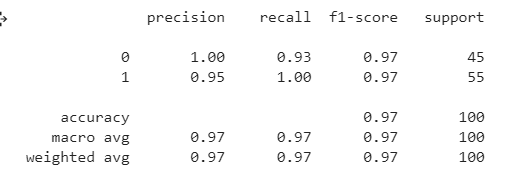

---

**Improved model with 97% accuracy**

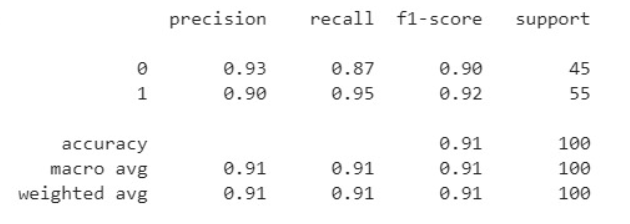

---

**Original model with 91% accuracy**

the orginal model was initialised with learning rate of 0.001, 16 hidden nodes and 100k epochs whereas the improved model was initialised with the same learning rate and same number of hidden nodes for both hidden layers and also 100k epochs. this shows that with a large dataset, the model accuracy can be improved with more hidden layers.

**Early stopping**



```
loss=[]
low_loss_count=10
epochs = 100000
for i in tqdm(range(epochs)):

  loss.append(NN.evaluate(NN.y, NN.ypred))
  NN.train(data_train_scaled, target_train)
  if loss[-1]<0.1: #stop condition
    low_loss_count-=1
  if low_loss_count==0:
    break
```

early stopping works by preventing the model from training further after running through certain number of epochs when the loss has reached a certain threshold. For the example above, the loss threshold is set at 0.1. so once loss goes below 0.1, the model will stop training to prevent overfitting.

**Regularization**
```
self.weights1 =self.weights1 + self.lr*d_weights1 - self.lamda * self.weights1
self.weights2 =self.weights2 + self.lr*d_weights2- self.lamda * self.weights2
self.weights3 =self.weights3 + self.lr*d_weights3- self.lamda * self.weights3

self.loss = self.loss_function(self.y, self.ypred) + self.lamda*(np.sum(np.square(self.weights1))+ np.sum(np.square(self.weights2))+ np.sum(np.square(self.weights3)))/(2)
```
Regularization works by introducing a lambda value to the weight update. when there is a parameter which is updated to become significantly large, the lambda acts as a counter weight by increasing the loss value which will then be backpropagated back to the parameter where it be updated to a smaller value. This prevents the value of weights to go to the extreme ends of 0 or 1 which causes it to be 'dead' weights. this prevents the model from training further.

### Phase 2: Notes

* All changes to the model can be tested using any one of the datasets used for classification test *(Problem 1)*, regression test *(Problem 2)*, or breast cancer dataset *(Problem 4)*
* Any code snippet that is modified should be written separately in code cells above.
* All modification and their impact on model performance must be described in detail in text cells below. Feel free to add images, mathematical equations, flowcharts, comparison scores, etc.
* Add as many number of text or code cells as required
* Note that sometimes it is easy to copy the outcomes from a previous cell execution in the form of an image (example, right click -> save image or screenshot), and embed the image in a text cell to describe the outcome.



### Phase 3: Classify cancerous cells using Wisconsin Breast Cancer Dataset

It is important to evaluate your Neural Network implementation on real-life dataset in order to measure performance, and identify scope for improvements. In this problem you will test the best variant of your model on the breast cancer dataset. More information about the data can be found [here](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29).



#### 3.1 Load Data

Please note that the data loaded may not be normalized. Implement a data noramalization function and process the data through the normalizer before using it for training.

The dataset consists of 569 samples and 30 features. There are two classes identifying the cancer as bening or malign.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.manifold import TSNE

In [ ]:
# DO NOT MODIFY this cell

data = load_breast_cancer().data
target = load_breast_cancer().target

test_idx = np.array([  9,  10,  12,  15,  16,  20,  22,  25,  38,  47,  57,  61,  68,
        73,  74,  84,  85,  91,  93, 108, 112, 117, 119, 135, 136, 138,
       140, 147, 149, 152, 171, 172, 173, 180, 182, 186, 187, 205, 207,
       210, 218, 235, 239, 242, 251, 267, 270, 275, 283, 285, 286, 288,
       291, 305, 307, 310, 315, 318, 319, 323, 337, 339, 346, 350, 352,
       368, 370, 374, 378, 389, 402, 408, 414, 415, 419, 422, 428, 430,
       433, 435, 442, 451, 458, 459, 464, 465, 469, 470, 480, 484, 486,
       501, 510, 532, 533, 536, 537, 543, 553, 560])

train_idx = list(set(test_idx)^set(np.arange(len(data))))

data_train = data[train_idx]
target_train = target[train_idx]

data_test = data[test_idx]
target_test= target[test_idx]

In [ ]:
def normalize(data, tr_min, tr_max):
    data = (data-tr_min)/(tr_max-tr_min)
    return data


data_train_scaled = normalize(data_train,data_train.min(axis=0),data_train.max(axis=0))
target_train = target_train.reshape(-1,1)

data_test_scaled = normalize(data_test,data_train.min(axis=0),data_train.max(axis=0))
target_test = target_test.reshape(-1,1)

#### 3.2 Training and Prediction

In [ ]:
learn_rate=0.001
NN = NeuralNetwork_improved(data_train_scaled, target_train, 16, 16, learn_rate,0)

In [ ]:
loss=[]
low_loss_count=10
epochs = 100000
for i in tqdm(range(epochs)):

  loss.append(NN.evaluate(NN.y, NN.ypred))
  NN.train(data_train_scaled, target_train)
  if loss[-1]<0.1: #stop condition
    low_loss_count-=1
  if low_loss_count==0:
    break

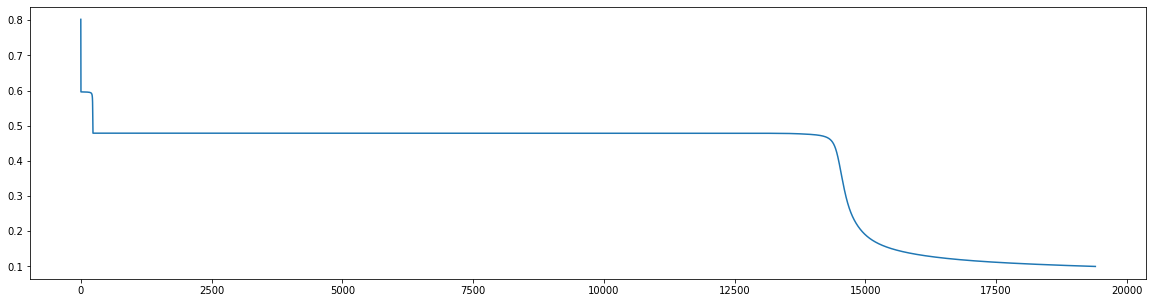

In [ ]:
f = plt.figure(figsize=(20,5))
plt.plot(loss)

#### 3.3 Results and Visualization

In [ ]:
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, confusion_matrix

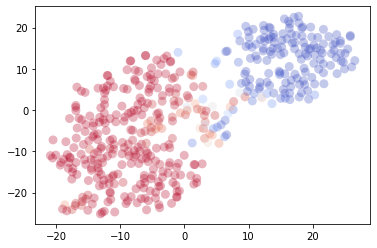

In [ ]:
# Do not modify this cell
y_pred = NN.predict(data_train_scaled)
y_pred_class = np.where(y_pred>=0.5, 1, 0)

X_embedded = TSNE(n_components=2).fit_transform(data_train_scaled)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_pred, cmap="coolwarm", alpha=0.3, linewidth=0, s=80)

In [ ]:
y_pred = NN.predict(data_test_scaled)
y_pred_class = np.where(y_pred>=0.5, 1, 0)
print(classification_report(target_test, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        45
           1       0.95      1.00      0.97        55

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



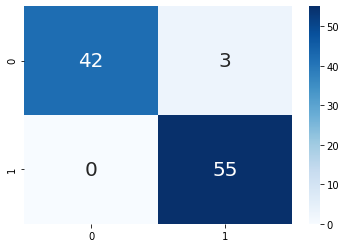

In [ ]:
sns.heatmap(confusion_matrix(target_test, y_pred_class), annot=True, annot_kws={"size": 20}, cmap='Blues')

**model used for phase 3 with 97% accuracy**


```
class NeuralNetwork_improved:
    def __init__(self, x, y, hidden_nodes1, hidden_nodes2, learning_rate, lamda, weights=None, loss_function = "rmse", activation_function = "sigmoid"):
        self.x = x
        self.y = y
        self.ypred = np.zeros(y.shape)

        self.hidden_nodes1 = hidden_nodes1
        self.hidden_nodes2 = hidden_nodes2
        if weights:
          self.weights1 = weights[0]
          self.weights2 = weights[1]
          self.weights3 = weights[2]
          self.bias1 = weights[3]
          self.bias2 = weights[4]
          self.bias3 = weights[5]
        else:
          self.weights1= np.random.rand(self.x.shape[1], self.hidden_nodes1)
          
          self.weights2 = np.random.rand(self.hidden_nodes1, self.hidden_nodes2)
          self.weights3 = np.random.rand(self.hidden_nodes2, 1)
          self.bias1 = np.random.rand(self.hidden_nodes1)
          self.bias2 = np.random.rand(self.hidden_nodes2)
          self.bias3 = np.random.rand(1)

        self.lr = learning_rate

        activation_function_dict = {"sigmoid": sigmoid, "relu": relu}
        loss_function_dict = {"rmse": rmse, "cross_entropy": cross_entropy}
        
        self.lamda = lamda
        self.activation_function = activation_function_dict[activation_function]
        self.loss_function = loss_function_dict[loss_function]
        
        
    def feedforward(self):
      
        self.layer1 = self.activation_function(np.dot(self.x,self.weights1)+self.bias1)
        
        self.layer2 = self.activation_function(np.dot(self.layer1,self.weights2)+self.bias2)
        
        self.layer3 = self.activation_function(np.dot(self.layer2,self.weights3)+self.bias3)
        return self.layer3
        
    def backprop(self):
        if (self.loss_function==rmse):
          loss_deriv=rmse_derivative
        elif (self.loss_function == cross_entropy):
          loss_deriv = cross_entropy_derivative
        if (self.activation_function==sigmoid):
          activation_deriv = sigmoid_derivative
        elif (self.activation_function==relu):
          activation_deriv = relu_derivative
        d_loss = loss_deriv(self.y, self.ypred)

        dz_3 = d_loss * activation_deriv(self.layer3)
        d_weights3 = np.dot(self.layer2.T, dz_3)
        d_bias3 =  np.dot(np.ones(dz_3.T.shape),dz_3)
        
        dz_2 = np.dot(dz_3, self.weights3.T) * activation_deriv(self.layer2)
        d_weights2 = np.dot(self.layer1.T, dz_2)
        d_bias2 = np.dot(np.ones(self.layer1.shape[0]), dz_2)

        dz_1 = np.dot(dz_2, self.weights2.T) * activation_deriv(self.layer1)
        d_weights1 =  np.dot(self.x.T, dz_1)
        d_bias1 = np.dot(np.ones(self.x.shape[0]), dz_1)

        # update parameters

        self.weights1 =self.weights1 + self.lr*d_weights1 - self.lamda * self.weights1
        self.weights2 =self.weights2 + self.lr*d_weights2- self.lamda * self.weights2
        self.weights3 =self.weights3 + self.lr*d_weights3- self.lamda * self.weights3

        self.bias1 += self.lr*d_bias1
        self.bias2 += self.lr*d_bias2
        self.bias3 += self.lr*d_bias3[0]
        loss = self.evaluate(self.y, self.ypred)

    def train(self, x, y):

        self.x = x
        self.y = y

        # Write your code here
        # predict

        self.ypred = self.feedforward()

        # backpropagate
        self.backprop()
    
    def predict(self, x):

        self.x = x

        # Write your code here
        self.ypred = self.feedforward()
        return self.ypred

    def evaluate(self, y, ypred):

        self.y = y
        self.ypred = ypred

        # write your code here
        self.loss = self.loss_function(self.y, self.ypred) + self.lamda*(np.sum(np.square(self.weights1))+ np.sum(np.square(self.weights2))+ np.sum(np.square(self.weights3)))/(2)
        return self.loss
    def get_weights(self):
        return (self.weights1,self.weights2,self.weights3,self.bias1,self.bias2,self.bias3)
```



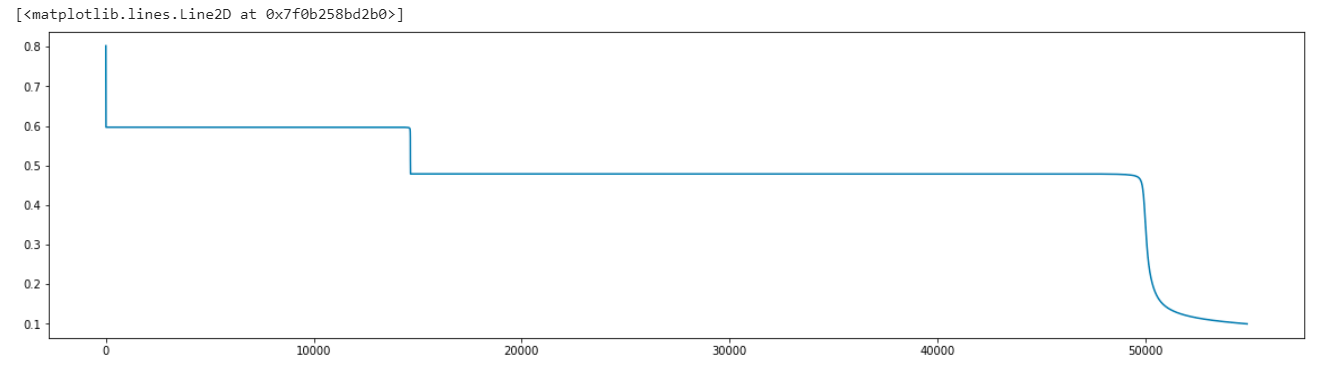


---

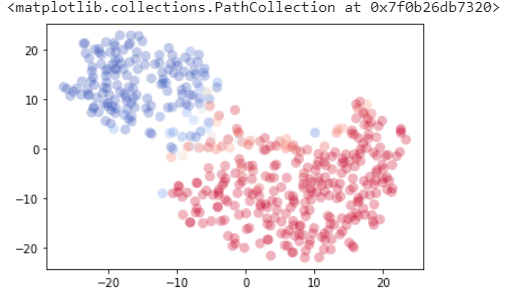



---


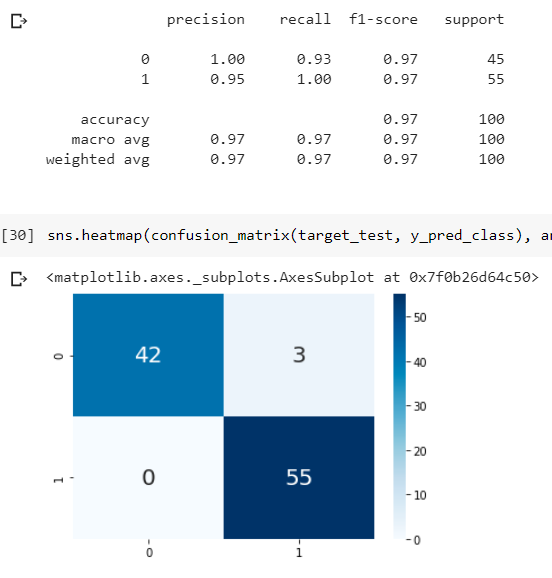

Results for phase 3 above


For the results above, i used a model with 2 hidden layers with each layer containing 20 nodes. I also implemented early stopping where during training of the model if the loss goes below 0.1, the training will be stopped. this ensures that overfitting will not be a factor when the model tries to predict for the testing data.